# Linear Layer

We will be implementing a **Linear Layer** as they are a fundamental operation in DL. The objective of a linear layer is to map a fixed number of inputs to a desired output (whether it be a regression or classification task)



### Forward Pass

Mathematically speaking, a linear layer, or a fully-connected layer, is the equivalent of a simple multiple regression model:

$$\hat{y}=1w_0+x_1w_1+x_2w_2+ \cdots +x_{f+1}w_f$$

where $w_j,j=0,1,...,f$ are the regression coefficients and $x_{j+1}$ are the input features.

Generally, however, we will want to express this in matrix notation to represent our data (and operations) in a compact way

$$
\begin{equation}\hat{Y} = \begin{pmatrix}\hat{y}_1 \\\hat{y}_1 \\\vdots \\\hat{y}_n\end{pmatrix}X = \begin{pmatrix}1 & x_{11} & x_{12}  & \cdots &x_{1k} \\1 & x_{21} & x_{22}  & \cdots &x_{2k} \\\vdots & \vdots & \vdots & \vdots & \vdots \\1 & x_{n1} & x_{n2} & \cdots &x_{nf} \\\end{pmatrix}w=\begin{pmatrix}w_0 \\w_1 \\\vdots \\w_k\end{pmatrix}\end{equation}
$$

$$
\hat{Y} = Xw
$$

This amounts to a simple Matrix-vector operation where each input receives one hidden unit!

What if we wanted more?

We would add as many additional columns of regression coefficients to our matrix $W$ as our desired quantity of hidden units

$$
\begin{equation}W=\begin{pmatrix}w_{00} & x_{01} & w_{02} & \cdots &w_{0h} \\w_{10} & x_{11} & w_{12} & \cdots &w_{1h} \\\vdots & \vdots & \vdots & \cdots & \vdots \\w_{f0} & x_{f1} & w_{f2} & \cdots &w_{fh} \end{pmatrix}\end{equation}
$$


where $w_{jk},j=0,1,...,f; k=0,1,...,h$

This can be seen as a form of **"batching"** the weights as we not only want one hidden unit, but many.

In this sense, we can now **generalize** our fully-connected layer to any kind of dimension (as long as it is feasible to our own memory capacity):

$$input\ *\ output=\ n \ x \ f\  *\  f\  x\  h\ =\ n\ x\ h\ =\ output$$

**NOTE**: The dimension of the output will always be ```(n, h)```. This property becomes crucial when generalizing the gradients of any differentiable operation

### Backward Pass

Now that we know how to implement the forward pass, we must next solve how it is that we are going to backpropagate our linear operation. 

Keep in mind that backpropagation is simply the gradient of our latest forward operation (call it $o$) w.r.t. our weight parameters $w$, which, if many intermediate operations have been performed, we attain by the chain-rule
$$
\hat{y} = 1w_0+x_1w_1+x_2w_2+x_3w_3\\z = \sigma(\hat{y})\\o = L(z,y) \\
$$

$$
\frac{\partial o}{\partial w} = \frac{\partial o}{\partial z}*\frac{\partial z}{\partial \hat{y}}*\frac{\partial \hat{y}}{\partial w}
$$

Now, notice that during the backward pass, partial gradients can be classified in two ways:

1. An **Intermediate operation** ($\frac{\partial o}{\partial z},\frac{\partial z}{\partial \hat{y}}$) or 
2. A **"Receiver" operation** ($\frac{\partial \hat{y}}{\partial w}$)

Notice that the intermediates have to be calculated to get to our "Receiver" operation, which receives a "step" operation once its gradient has been calculated.

In the above example, none of our intermediate operations introduced any new parameters to our model. However, what if they did? Look below

$$
\hat{y_1} = 1w_0+x_1w_1+x_2w_2+x_3w_3\\z = \sigma(\hat{y})\\l = z*w_4 \\o = L(l,y) \\
$$

$$
\frac{\partial o}{\partial w_{0:3}} = \frac{\partial o}{\partial l}*\frac{\partial l}{\partial z}*\frac{\partial z}{\partial \hat{y}}*\frac{\partial \hat{y}}{\partial w_{0:3}} \\\frac{\partial o}{\partial w_{4}} = \frac{\partial o}{\partial l} * \frac{\partial l}{\partial w_4}
$$

Given that we now have two operations that introduce parameters to our model, we need to make two backward calculations. More importantly, however, notice that their "paths" differ in the way that they take the gradient of $l$ w.r.t. either its parameter $w_4$ or its input $z$

Clearly, these operations are not equivalent

$$
\frac{\partial l}{\partial z} \not= \frac{\partial l}{\partial w_4}
$$

Despite them originating from the same forward linear operation. 

Hence, this demonstrates that for any forward operation with weights, such as our Linear Layer, we need to implement two different backward operations: the intermediate pass (which takes gradient w.r.t. the input) and the "Receiver" pass (which takes gradient w.r.t. operation parameter). For either of these operations, we must integrate the incoming gradient ($\frac{\partial z}{\partial \hat{y}},\frac{\partial o}{\partial l}$) with our Linear Layer gradient ($\frac{\partial \hat{y}}{\partial w_{0:3}},\frac{\partial l}{\partial w_4}$)

Having defined the two types of backward operations, we will now define the general method to compute both calculations on our Linear Layer.

Assume we have below forward operation

$$
y=1w_0+2w_1+3w_2+4w_3
$$

Then, for the backward phase, we need to take the partial derivative w.r.t. to each weight coefficient

$$
\frac{\partial y}{\partial w} = 1\frac{\partial y}{\partial w_0} + 2\frac{\partial y}{\partial w_1} + 3\frac{\partial y}{\partial w_2} + 4\frac{\partial y}{\partial w_3}=1+2+3+4
$$


What about the partial w.r.t. its input?

$$
\frac{\partial y}{\partial x} = w_0\frac{\partial y}{\partial x_0} + w_1\frac{\partial y}{\partial x_1} + w_2\frac{\partial y}{\partial x_2} + w_3\frac{\partial y}{\partial x_3}=w_0+w_1+w_2+w_3
$$


Easy, right? We find that the "Receiver" version of our backward pass is equivalent to the input while its intermediate derivative is equal to its weight parameters. 

As a last step, to really be able to generalize these operations to any kind of differentiable architecture, we will show the general procedure to integrate the incoming gradient with our Linear gradient

**Gradient Generalization w.r.t weights and input**


$$
input: \text{n x f}
\n$$

$$
weights: \text{f x h}
$$

$$
y: \text{n x h}
$$

$$
incoming\_grad: \text{n x h}
$$

$$
grad\_y\_wrt\_weights: \text{(incoming_grad'*input)' = (h x n * n x f)' = f x h}
$$

$$
grad\_y\_wrt\_input: \text{(incoming_grad*weights') = (n x h * h x f) = n x f}
$$


Now that we know how to generalize a linear layer, let's implement the above concepts in PyTorch



### Create Linear Layer with PyTorch

Now we will implement our own Linear Layer in PyTorch using the concepts we defined above. 

**However**, before we begin, we will take a different approach in how we will define our bias

Initially, we defined a bias column as below:

$$
\begin{pmatrix}1 & x_{11} & x_{12} & x_{13} \\1 & x_{21} & x_{22} & x_{21} \\1 & x_{31} & x_{32} & x_{33} \\\end{pmatrix}
$$

However, this formulation has some practical problems. For every forward input that we receive, we will have to ***manually add a column bias***. This column addition is a non-differentiable operation and hence, it messes with the entire DL methodology of only operating with differentiable functions. 

Therefore, we will re-formulate the bias as an addition operation of our linear output

$$
\begin{equation}\begin{pmatrix}1 & x_{11} & x_{12} & x_{13} \\1 & x_{21} & x_{22} & x_{21} \\1 & x_{31} & x_{32} & x_{33} \\\end{pmatrix}\begin{pmatrix}w_0 \\w_1 \\w_2 \\w_3\end{pmatrix}\end{equation} = 
\begin{pmatrix}y_0 \\y_1 \\y_2 \end{pmatrix} = 
\begin{pmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{21} \\ x_{31} & x_{32} & x_{33} \\\end{pmatrix}
\begin{pmatrix}w_1 \\w_2 \\w_3\end{pmatrix} + 
\begin{pmatrix}w_0 \\w_0 \\w_0\end{pmatrix}
$$

In this sense, our Linear Layer will now be a two-step operation if the bias is included. 

As for the backward pass, the differential of a simple addition will always be 1s. Hence, our forward and backward pass for the bias becomes two simple operations. 

Now, to reduce boilerplate code, we will subclass our Linear operation under PyTorch's ```torch.autograd.Function```. This enables us to do three things:

i) define and generalize the forward and backward pass 

ii) use PyTorch's "context manager" that allows us to save objects from the forward and backward pass and lets us know which forward inputs need gradients (which let us know if we need to apply an Intermediate or "Receiver" operation during backward phase)

iii) Store backward's gradient output to our defined weight parameters

In [1]:
import torch
import torch.nn as nn
torch.randn((2,2)).cuda()

tensor([[ 0.6623,  0.8345],
        [-0.1770,  0.7527]], device='cuda:0')

In [2]:
# keep in mind that @staticmethod simply let's us initiate a class without instantiating it
# Remember that our gradient will be of equal dimensions as our weight parameters


class Linear_Layer(torch.autograd.Function):
    """
    Define a Linear Layer operation
    """
    @staticmethod
    def forward(ctx, input,weights, bias = None):
        """
        In the forward pass, we feed this class all necessary objects to 
        compute a  linear layer (input, weights, and bias)
        """
        # input.dim = (B, in_dim)
        # weights.dim = (in_dim, out_dim)
        
        # given that the grad(output) wrt weight parameters equals the input,
        # we will save it to use for backpropagation
        ctx.save_for_backward(input, weights, bias)
        
        
        # linear transformation
        # (B, out_dim) = (B, in_dim) * (in_dim, out_dim)
        output = torch.mm(input, weights)
        
        if bias is not None:
            # bias.shape = (out_dim)
            
            # expanded_bias.shape = (B, out_dim), repeats bias B times
            expanded_bias = bias.unsqueeze(0).expand_as(output)
            
            # element-wise addition
            output += expanded_bias
        
        return output

    
    # ```incoming_grad``` represents the incoming gradient that we defined on the "Backward Pass" section
    # incoming_grad.shape == output.shape == (B, out_dim)
    
    @staticmethod
    def backward(ctx, incoming_grad):
        """
        In the backward pass we receive a Tensor (output_grad) containing the 
        gradient of the loss with respect to our f(x) output, 
        and we now need to compute the gradient of the loss
        with respect to our defined function.
        """
        # incoming_grad.shape = (B, out_dim)
        
        # extract inputs from forward pass
        input, weights, bias = ctx.saved_tensors 
        
        # assume none of the inputs need gradients
        grad_input = grad_weight = grad_bias = None
        
        
        # we will figure out which forward inputs need grads
        # with ctx.needs_input_grad, which stores True/False
        # values in the order that the forward inputs came 
        
        # in each of the below gradients, 
        # we need to return as many parameters as we used during forward pass

        
        # if input requires grad
        if ctx.needs_input_grad[0]:
            # (B, in_dim) = (B, out_dim) * (out_dim, in_dim)
            grad_input = incoming_grad.mm(weights.t())
            
        # if weights require grad
        if ctx.needs_input_grad[1]:
            # (out_dim, in_dim) = (out_dim, B) * (B, in_dim) 
            grad_weight = incoming_grad.t().mm(input)
            
        # if bias requires grad
        if bias is not None and ctx.needs_input_grad[2]:
            # below operation is equivalent of doing it the "long" way
            # given that bias grads = 1,
            # torch.ones((1,B)).mm(incoming_grad)  
            # (out) = (1,B)*(B,out_dim)
            grad_bias = incoming_grad.sum(0)
        
        
        
        
        # below, if any of the grads = None, they will simply be ignored
        
        # add grad_output.t() to match original layout of weight parameter
        return grad_input, grad_weight.t(), grad_bias
        
        

In [59]:
# test forward method
dummy_input= torch.ones((1,2)) # input 
dummy_weight = nn.Parameter(torch.randn((2,3))) # parameter holds i) weight data ii) calculated gradientt
output = Linear_Layer.apply(dummy_input, dummy_weight)
print(f"forward output: \n{output}")
print('-'*70)
print(f"forward output shape: \n{output.shape}")

forward output: 
tensor([[0.7532, 0.5865, 0.9564]], grad_fn=<Linear_LayerBackward>)
----------------------------------------------------------------------
forward output shape: 
torch.Size([1, 3])


In [60]:
# test backward pass
## calculate gradient of subsequent operation w.r.t. defined weight parameters
incoming_grad = torch.ones((1,3)) # shape equals output dims
output.backward(incoming_grad) # calculate parameter gradients

In [61]:
# extract calculated gradient 
dummy_weight.grad 

tensor([[1., 1., 1.],
        [1., 1., 1.]])

Now that we have our forward and backward method defined, let us define some important concepts. 

By nature, Tensors that require gradients (such as parameters) automatically "record" a history of all the operations that have been applied to them. 

For example, our above forward ```output``` contains the method ```grad_fn=<Linear_LayerBackward>```, which tells us that our output is the result of our defined Linear Layer operation, which its history began with ```dummy_weight```.

As such, once we call ```output.backward(incoming_grad)```, PyTorch automatically, from the last operation to the first, calls the backward method in order to compute the chain-gradient that corresponds to our parameters.

To truly understand what is going on and how PyTorch simplifies the backward phase, we will show a more extensive example where we manually compute the gradient of our paramters with our own defined backward() methods

In [62]:
class Linear_Layer_():
    def __init__(self):
        ''

    def forward(self, input,weights, bias = None):
        self.input = input
        self.weights = weights
        self.bias = bias
        
        output = torch.mm(input, weights)
        
        if bias is not None:
            # bias.shape = (out_dim)
            
            # expanded_bias.shape = (B, out_dim), repeats bias B times
            expanded_bias = bias.unsqueeze(0).expand_as(output)
            
            # element-wise addition
            output += expanded_bias
        
        return output

    def backward(self, incoming_grad):

        # extract inputs from forward pass
        input = self.input
        weights = self.weights
        bias = self.bias
        
        grad_input = grad_weight = grad_bias = None
        
        # if input requires grad
        if input.requires_grad:
            grad_input = incoming_grad.mm(weights.t())
            
        # if weights require grad
        if weights.requires_grad:
            grad_weight = incoming_grad.t().mm(input)
            
         # if bias requires grad
        if bias.requires_grad:
            grad_bias = incoming_grad.sum(0)
        
        return grad_input, grad_weight.t(), grad_bias

In [95]:
# manual forward pass

input= torch.ones((1,2)) # input 

# define weights for linear layers
weight1 = nn.Parameter(torch.randn((2,3))) 
weight2 = nn.Parameter(torch.randn((3,5))) 
weight3 = nn.Parameter(torch.randn((5,1))) 

# define bias for Linear layers
bias1 = nn.Parameter(torch.randn((3))) 
bias2 = nn.Parameter(torch.randn((5))) 
bias3 = nn.Parameter(torch.randn((1))) 

# define Linear Layers
linear1 = Linear_Layer_()
linear2 = Linear_Layer_()
linear3 = Linear_Layer_()


# define forward pass
output1 = linear1.forward(input, weight1,bias1)
output2 = linear2.forward(output1, weight2,bias2)
output3 = linear3.forward(output2, weight3,bias3)

print(f"outpu1.shape: {output1.shape}")
print('-'*50)
print(f"outpu2.shape: {output2.shape}")
print('-'*50)
print(f"outpu3.shape: {output3.shape}")

outpu1.shape: torch.Size([1, 3])
--------------------------------------------------
outpu2.shape: torch.Size([1, 5])
--------------------------------------------------
outpu3.shape: torch.Size([1, 1])


In [96]:
# manual backward pass

# compute intermediate and receiver backward pass
input_grad1, weight_grad1, bias_grad1 = linear3.backward(torch.tensor([[1.]]))

print(f"input_grad1.shape: {input_grad1.shape}")
print('-'*50)
print(f"weight_grad1.shape: {weight_grad1.shape}")
print('-'*50)
print(f"bias_grad1.shape: {bias_grad1.shape}")

input_grad1.shape: torch.Size([1, 5])
--------------------------------------------------
weight_grad1.shape: torch.Size([5, 1])
--------------------------------------------------
bias_grad1.shape: torch.Size([1])


In [97]:
# compute intermediate and receiver backward pass
input_grad2, weight_grad2, bias_grad2 = linear2.backward(input_grad1)

print(f"input_grad2.shape: {input_grad2.shape}")
print('-'*50)
print(f"weight_grad2.shape: {weight_grad2.shape}")
print('-'*50)
print(f"bias_grad2.shape: {bias_grad2.shape}")

input_grad2.shape: torch.Size([1, 3])
--------------------------------------------------
weight_grad2.shape: torch.Size([3, 5])
--------------------------------------------------
bias_grad2.shape: torch.Size([5])


In [98]:
# compute receiver backward pass
input_grad3, weight_grad3, bias_grad3 = linear1.backward(input_grad2)

print(f"input_grad3: {input_grad3}")
print('-'*50)
print(f"weight_grad3.shape: {weight_grad3.shape}")
print('-'*50)
print(f"bias_grad3.shape: {bias_grad3.shape}")

input_grad3: None
--------------------------------------------------
weight_grad3.shape: torch.Size([2, 3])
--------------------------------------------------
bias_grad3.shape: torch.Size([3])


In [99]:
# now, add gradients to the corresponding parameters
weight1.grad = weight_grad3
weight2.grad = weight_grad2
weight3.grad = weight_grad1

bias1.grad = bias_grad3
bias2.grad = bias_grad2
bias3.grad = bias_grad1

In [100]:
# inspect manual calculated gradients

print(f"weight1.grad = \n{weight1.grad}")
print('-'*70)
print(f"weight2.grad = \n{weight2.grad}")
print('-'*70)
print(f"weight3.grad = \n{weight3.grad}")
print('-'*70)

print(f"bias1.grad = \n{bias1.grad}") 
print('-'*70)
print(f"bias2.grad = \n{bias2.grad}")
print('-'*70)
print(f"bias3.grad = \n{bias3.grad}")

weight1.grad = 
tensor([[-0.9869,  0.0548,  0.3107],
        [-0.9869,  0.0548,  0.3107]], grad_fn=<TBackward>)
----------------------------------------------------------------------
weight2.grad = 
tensor([[ 2.3822,  0.9312,  2.2510, -1.0365,  3.1596],
        [ 1.3770,  0.5383,  1.3011, -0.5992,  1.8263],
        [-1.3396, -0.5237, -1.2658,  0.5829, -1.7767]], grad_fn=<TBackward>)
----------------------------------------------------------------------
weight3.grad = 
tensor([[-6.3651],
        [-3.5532],
        [-5.9865],
        [ 0.7347],
        [ 5.3876]], grad_fn=<TBackward>)
----------------------------------------------------------------------
bias1.grad = 
tensor([-0.9869,  0.0548,  0.3107], grad_fn=<SumBackward2>)
----------------------------------------------------------------------
bias2.grad = 
tensor([ 0.6981,  0.2729,  0.6597, -0.3038,  0.9260], grad_fn=<SumBackward2>)
----------------------------------------------------------------------
bias3.grad = 
tensor([1.])


In [101]:
# now, we take our "step"
lr = .01

# perform "step" on weight parameters
weight1.data.add_(weight1.grad, alpha = -lr) # ==weight1.data+weight1.grad*-lr
weight2.data.add_(weight2.grad, alpha = -lr)
weight2.data.add_(weight2.grad, alpha = -lr)

# perform "step" on bias parameters
bias1.data.add_(bias1.grad, alpha = -lr)
bias2.data.add_(bias2.grad, alpha = -lr)
bias2.data.add_(bias2.grad, alpha = -lr)

# now that the step has been performed, zero out gradient values
weight1.grad.zero_()
weight2.grad.zero_()
weight3.grad.zero_()

bias1.grad.zero_()
bias2.grad.zero_()
bias3.grad.zero_()

# get ready for the next forward pass

tensor([0.])

Phew! We have now officially performed a "step" update! Let's review what we did:

**1. Defined all needed forward and backward operations**

**2. Created a 3-layer model**

**3. Calculated forward pass**

**4. Calculated backward pass for all parameters**

**5. Performed step**

**6. zero-out gradients**

Of coarse, we could have simplified the code by creating a list like structure and loop all needed operations. 

However, for sake of clarity and understanding, we layed out all the steps in a logical manner. 

Now, how can the **equivalent of the forward and backward operations be performed in PyTorch?**

In [103]:
# PyTorch forward pass

input= torch.ones((1,2)) # input 

# define weights for linear layers
weight1 = nn.Parameter(torch.randn((2,3))) 
weight2 = nn.Parameter(torch.randn((3,5))) 
weight3 = nn.Parameter(torch.randn((5,1))) 

# define bias for Linear layers
bias1 = nn.Parameter(torch.randn((3))) 
bias2 = nn.Parameter(torch.randn((5))) 
bias3 = nn.Parameter(torch.randn((1))) 

# define Linear Layers
output1 = Linear_Layer.apply(input,weight1,bias1)
output2 = Linear_Layer.apply(output1, weight2, bias2)
output3 = Linear_Layer.apply(output2, weight3, bias3)



print(f"outpu1.shape: {output1.shape}")
print('-'*50)
print(f"outpu2.shape: {output2.shape}")
print('-'*50)
print(f"outpu3.shape: {output3.shape}")

outpu1.shape: torch.Size([1, 3])
--------------------------------------------------
outpu2.shape: torch.Size([1, 5])
--------------------------------------------------
outpu3.shape: torch.Size([1, 1])


In [104]:
# calculate all gradients with PyTorch's "operation history"
# it essentially just calls our defined backward methods in 
# the order of applied operations (such as we did above)
output3.backward()

In [105]:
# inspect PyTorch calculated gradients

print(f"weight1.grad = \n{weight1.grad}")
print('-'*70)
print(f"weight2.grad = \n{weight2.grad}")
print('-'*70)
print(f"weight3.grad = \n{weight3.grad}")
print('-'*70)

print(f"bias1.grad = \n{bias1.grad}") 
print('-'*70)
print(f"bias2.grad = \n{bias2.grad}")
print('-'*70)
print(f"bias3.grad = \n{bias3.grad}")

weight1.grad = 
tensor([[ 0.2195, -3.4776,  3.3395],
        [ 0.2195, -3.4776,  3.3395]])
----------------------------------------------------------------------
weight2.grad = 
tensor([[ 2.6869, -0.6504,  1.1048, -1.9001,  3.5497],
        [ 1.7754, -0.4298,  0.7300, -1.2555,  2.3455],
        [ 1.1182, -0.2707,  0.4598, -0.7908,  1.4773]])
----------------------------------------------------------------------
weight3.grad = 
tensor([[ 0.0630],
        [ 1.2594],
        [-3.3520],
        [-1.9508],
        [-0.3700]])
----------------------------------------------------------------------
bias1.grad = 
tensor([ 0.2195, -3.4776,  3.3395])
----------------------------------------------------------------------
bias2.grad = 
tensor([ 1.3815, -0.3344,  0.5681, -0.9770,  1.8251])
----------------------------------------------------------------------
bias3.grad = 
tensor([1.])


Now, instead of having to define a weight and parameter bias each time we need a ```Linear_Layer```, we will wrap our operation on PyTorch's ```nn.Module```, which allows us to:

i) define all parameters (weight and bias) in a single object and 

ii) create an easy-to-use interface to create any Linear transformation of any shape (as long as it is feasible to your memory)

In [3]:
class Linear(nn.Module):
    def __init__(self, in_dim, out_dim, bias = True):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        # define parameters
        
        # weight parameter
        self.weight = nn.Parameter(torch.randn((in_dim, out_dim)))
        
        # bias parameter
        if bias:
            self.bias = nn.Parameter(torch.randn((out_dim)))
        else:
            # register parameter as None if not initialized
            self.register_parameter('bias',None)
        
    def forward(self, input):
        output = Linear_Layer.apply(input, self.weight, self.bias)
        return output

In [109]:
# initialize model and extract all model parameters
m = Linear(1,1, bias = True)
param = list(m.parameters()) 
param

[Parameter containing:
 tensor([[-1.7011]], requires_grad=True),
 Parameter containing:
 tensor([-0.0320], requires_grad=True)]

In [195]:
# once gradients have been computed and a step has been taken, 
# we can zero-out all gradient values in parameters with below
m.zero_grad()

# MNIST

We will implement our Linear Layer operation to classify digits on the MNIST dataset. 

This data is often used as an introduction to DL as it has two desired properties:

1. 60000 records of observations

2. Binary input (dramatically reduces complexity)

Given the volumen of data, it may not be very feasible to load all 60000 images at once and feed it to our model. Hence, we will parse our data into batches of 128 to alleviate I/O.

We will import this data using ```torchvision``` and feed it to our ```DataLoader``` that enables us to parse our data into batches

In [4]:
# import trainingMNIST dataset

import torchvision
from torchvision import transforms
import numpy as np
from torchvision.utils import make_grid 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

root = r'C:\Users\erick\PycharmProjects\untitled\3D_2D_GAN\MNIST_experimentation'
train_mnist = torchvision.datasets.MNIST(root = root, 
                                      train = True, 
                                        transform = transforms.ToTensor(),
                                      download = False, 
                                  )

train_mnist.data.shape

torch.Size([60000, 28, 28])

In [5]:
# import testing MNIST dataset

eval_mnist = torchvision.datasets.MNIST(root = root, 
                                      train = False,
                                      transform = transforms.ToTensor(),
                                      download = False, 
                                  )
eval_mnist.data.shape

torch.Size([10000, 28, 28])

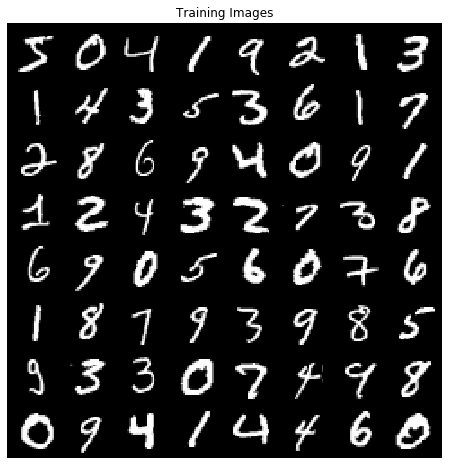

In [166]:
# visualize data
# visualize our data

grid_images = np.transpose(make_grid(train_mnist.data[:64].unsqueeze(1)), (1,2,0))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(grid_images,cmap = 'gray')

In [6]:
# normalize data
train_mnist.data = (train_mnist.data.float() - train_mnist.data.float().mean()) / train_mnist.data.float().std()
eval_mnist.data = (eval_mnist.data.float() - eval_mnist.data.float().mean()) / eval_mnist.data.float().std()

In [9]:
# parse data to batches of 128

# pin_memory = True if you have CUDA. It will speed up I/O

train_dl = DataLoader(train_mnist, batch_size = 64, 
                      shuffle = True, pin_memory = True)

eval_dl = DataLoader(eval_mnist, batch_size = 128, 
                      shuffle = True, pin_memory = True)


batch_images, batch_labels = next(iter(train_dl))
print(f"batch_images.shape: {batch_images.shape}")
print('-'*50)
print(f"batch_labels.shape: {batch_labels.shape}")

batch_images.shape: torch.Size([64, 1, 28, 28])
--------------------------------------------------
batch_labels.shape: torch.Size([64])


# Build Neural Network

Now that our data has been defined, we will implement our architecture

This section will introduce three new conceps:

1. [ReLU](path) 
2. [Cross-Entropy-Loss](path)
3. [Stochastic Gradient Descent](path)

In short, ReLU is a famous activation function that adds non-linearity to our model, Cross-Entropy-Loss is the criterion we use to train our model, and Stochastic Gradient Descent defines the "step" operation to update our weight parameters.

For sake of compactness, a comprehensive description and implementation of these functions can both be found in the main repo or if you click on their hyperlinks.

Our model will consist of below structure (where each operation except for the last is followed by a ReLU operation):

```[128, 64, 10]```

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, num_units = 128, activation = nn.ReLU()):
        super().__init__()
        
        # fully-connected layers
        self.fc1 = Linear(784,num_units)
        self.fc2 = Linear(num_units , num_units//2)
        self.fc3 = Linear(num_units // 2, 10)
        
        # init ReLU
        self.activation = activation
        
    def forward(self,x):
        
        # 1st layer
        output = self.activation(self.fc1(x))
        
        # 2nd layer
        output = self.activation(self.fc2(output))
        
        # 3rd layer
        output = self.fc3(output)
        
        return output
        

In [13]:
# initiate model
model = NeuralNet(128)
model

NeuralNet(
  (fc1): Linear()
  (fc2): Linear()
  (fc3): Linear()
  (activation): ReLU()
)

In [117]:
# test model
input = torch.randn((1,784))
model(input).shape

torch.Size([1, 10])

Next, we will instantiate our loss criterion

We will use Cross-Entropy-Loss as our criterion for two reasons:
1. Our objective is to classify data and
2. There are 10 criterions to choose from (0-9)

This criterion exponentially "penalizes" the model if the confidence for our prediction target is far from the truth (e.g. a confidence prediction of .01 for 9 when it's actually the truth value) but is much less militant if our prediction is close to the truth

The ```CrossEntropyLoss``` criterion performs a Softmax activation before computing the Cross-Entropy-Loss as our criterion is only well-defined on a domain from [0,1]

In [11]:
# initiate loss criterion
criterion = nn.CrossEntropyLoss()
criterion

CrossEntropyLoss()

Next, we define our optimizer: Stochastic Gradient Descent. All this algorithm will do is extract the gradient values of our parameters and perform below step function:

$$
w_j=w_j-\alpha\frac{\partial }{\partial w_j}L(w_j)
$$

In [14]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr = .01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

We will use PyTorch's ```device``` object and feed it to our model's ```.to``` method to place all our operation on our GPU for accelarated traning

In [15]:
# if we do not have a GPU, skip this step

# define a CUDA connection
device = torch.device('cuda')

# place model in GPU
model = model.to(device)

## Train Neural Net

define training scheme

In [16]:
# compute average accuracy of batch

def accuracy(pred, labels):
    # predictions.shape = (B, 10)
    # labels.shape = (B)
    
    n_batch = labels.shape[0]
    
    # extract idx of max value from our batch predictions
    # predicted.shape = (B)
    _, preds = torch.max(pred, 1)
    
    
    # compute average accuracy of our batch
    compare = (preds == labels).sum()
    return compare.item() / n_batch
    
    

In [29]:

def train(model, iterator, optimizer, criterion):
    
    # hold avg loss and acc sum of all batches
    epoch_loss = 0
    epoch_acc = 0
    
    
    for batch in iterator:
        
        # zero-out all gradients (if any) from our model parameters
        model.zero_grad()
        
        
        
        # extract input and label
        
        # input.shape = (B, 784), "flatten" image
        input = batch[0].view(-1,784).cuda() # shape: (B, 784), "flatten" image
        # label.shape = (B)
        label = batch[1].cuda()
        
        
        # Start PyTorch's Dynamic Graph
        
        # predictions.shape = (B, 10)
        predictions = model(input)
        
        # average batch loss 
        loss = criterion(predictions, label)
        
        # calculate grad(loss) / grad(parameters)
        # "clears" PyTorch's dynamic graph
        loss.backward()
        
        
        # perform SGD "step" operation
        optimizer.step()
        
        
        # Given that PyTorch variables are "contagious" (they record all operations)
        # we need to ".detach()" to stop them from recording any performance
        # statistics
        
        
        # average batch accuracy
        acc = accuracy(predictions.detach(), label)
        

        

        
        # record our stats
        epoch_loss += loss.detach()
        epoch_acc += acc
        
    # NOTE: tense.item() unpacks Tensor item to a regular python object 
    # tense.tensor([1]).item() == 1
        
    # return average loss and acc of epoch
    return epoch_loss.item() / len(iterator), epoch_acc / len(iterator)


In [18]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
        
    # turn off grad tracking as we are only evaluation performance
    with torch.no_grad():
    
        for batch in iterator:

            # extract input and label       
            input = batch[0].view(-1,784).cuda()
            label = batch[1].cuda()


            # predictions.shape = (B, 10)
            predictions = model(input)

            # average batch loss 
            loss = criterion(predictions, label)

            # average batch accuracy
            acc = accuracy(predictions, label)

            epoch_loss += loss
            epoch_acc += acc
        
    return epoch_loss.item() / len(iterator), epoch_acc / len(iterator)

In [19]:
import time

# record time it takes to train and evaluate an epoch
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time # total time
    elapsed_mins = int(elapsed_time / 60) # minutes
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60)) # seconds
    return elapsed_mins, elapsed_secs

In [30]:
N_EPOCHS = 25

# track statistics
track_stats = {'epoch': [],
               'train_loss': [],
              'train_acc': [],
              'valid_loss':[],
              'valid_acc':[]}


best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dl, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, eval_dl, criterion)
    
    end_time = time.time()
    
    # record operations
    track_stats['epoch'].append(epoch + 1)
    track_stats['train_loss'].append(train_loss)
    track_stats['train_acc'].append(train_acc)
    track_stats['valid_loss'].append(valid_loss)
    track_stats['valid_acc'].append(valid_acc)
    
    

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    # if this was our best performance, record model parameters
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_linear_params.pt')
    
    # print out stats
    print('-'*75)
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')


---------------------------------------------------------------------------
Epoch: 01 | Epoch Time: 0m 30s
	Train Loss: 2.213 | Train Acc: 15.09%
	 Val. Loss: 11.462 |  Val. Acc: 9.38%
---------------------------------------------------------------------------
Epoch: 02 | Epoch Time: 0m 30s
	Train Loss: 2.201 | Train Acc: 15.77%
	 Val. Loss: 15.436 |  Val. Acc: 9.82%
---------------------------------------------------------------------------
Epoch: 03 | Epoch Time: 0m 30s
	Train Loss: 2.193 | Train Acc: 15.93%
	 Val. Loss: 17.744 |  Val. Acc: 9.46%
---------------------------------------------------------------------------
Epoch: 04 | Epoch Time: 0m 30s
	Train Loss: 2.168 | Train Acc: 17.62%
	 Val. Loss: 19.838 |  Val. Acc: 9.68%
---------------------------------------------------------------------------
Epoch: 05 | Epoch Time: 0m 30s
	Train Loss: 2.132 | Train Acc: 19.22%
	 Val. Loss: 21.154 |  Val. Acc: 9.47%
---------------------------------------------------------------------------

# Visualization

Looking at the above statistics is great, however, we would attain a much better understanding if we can graph our data in a way that is more appealing.

We will do this by using HiPlot, a newly release deep visualization library by Facebook.

HiPlot measures each unique dimension by inserting parallel vertical lines.

Before we use it, we need to format our data as a list of dictionaries

In [31]:
# format data 
import pandas as pd

stats = pd.DataFrame(track_stats)
stats

,epoch,train_loss,train_acc,valid_loss,valid_acc
0,1,2.212897,0.150920,11.462227,0.093750
1,2,2.201463,0.157666,15.435633,0.098200
2,3,2.193212,0.159348,17.743526,0.094640
3,4,2.167792,0.176156,19.837977,0.096816
4,5,2.132317,0.192181,21.154042,0.094739
5,6,2.100851,0.205507,21.467726,0.094640
6,7,2.076702,0.215452,19.181373,0.095431
7,8,2.051445,0.225546,17.387510,0.096420
8,9,2.031049,0.229428,15.643752,0.102255
9,10,2.012228,0.239622,15.169947,0.096321


In [49]:
data = []
for row in stats.iterrows():
    data.append(row[1].to_dict())
data

[{'epoch': 1.0,
  'train_loss': 2.212897131946295,
  'train_acc': 0.15091950959488273,
  'valid_loss': 11.462226964250396,
  'valid_acc': 0.09375},
 {'epoch': 2.0,
  'train_loss': 2.2014626053604744,
  'train_acc': 0.15766591151385928,
  'valid_loss': 15.43563340585443,
  'valid_acc': 0.0982001582278481},
 {'epoch': 3.0,
  'train_loss': 2.193212318013726,
  'train_acc': 0.15934834754797442,
  'valid_loss': 17.743525637856013,
  'valid_acc': 0.09464003164556962},
 {'epoch': 4.0,
  'train_loss': 2.1677922816164714,
  'train_acc': 0.1761560501066098,
  'valid_loss': 19.837977155854432,
  'valid_acc': 0.09681566455696203},
 {'epoch': 5.0,
  'train_loss': 2.1323169309701493,
  'train_acc': 0.1921808368869936,
  'valid_loss': 21.154041918018198,
  'valid_acc': 0.09473892405063292},
 {'epoch': 6.0,
  'train_loss': 2.100850640075293,
  'train_acc': 0.2055070628997868,
  'valid_loss': 21.467725536491297,
  'valid_acc': 0.09464003164556962},
 {'epoch': 7.0,
  'train_loss': 2.076701670567364,
  '

In [33]:
import hiplot as hip
hip.Experiment.from_iterable(data).display(force_full_width = True)

From the above visualization, we can infer properties about our model's performance:

* As epochs increase, train loss decreases
* As train loss decreases, training accuracy increases
* As training accuracy increases, validation loss decreases
* As validation loss decreases, however, validation accuracy does not seem to increase as linearly as the others

# Comparing Different Architectures

While the above insights are useful, it would be much better if we can compare the performance of the same model but with different parameters. 

Let us do this by testing four separate models with distinct hidden layer inputs:

1. ```[32, 16, 10]```
2. ```[64, 32, 10]```
3. ```[128, 64, 10]```
4. ```[256, 128, 10]```

We will compare these models by performing a 3-fold Cross-Validation (CV) on each of the models.

If you are unfamiliar with the concept, this [page](https://scikit-learn.org/stable/modules/cross_validation.html) will get you to speed

We could train all of these with the same approach as we did above, however, that will be a little redundant. 

Instead, we will use the ```skorch``` library to grid search our above models while performing 3-fold CV on each of them.

**NOTE:** ```skorch``` is a library that highly mimics the operations of ```sklearn```. Go to [link](https://nbviewer.jupyter.org/github/skorch-dev/skorch/blob/master/notebooks/Basic_Usage.ipynb) to learn more.

In [34]:
# concat training and testing data into two variables
X = torch.cat((train_mnist.data,eval_mnist.data),dim=0).view(70000,-1)
y = torch.cat((train_mnist.targets,eval_mnist.targets),dim=0).view(-1)

In [35]:
# Set up the equivalent hyperparameters as we had above

from skorch import NeuralNetClassifier
from torch import optim

net = NeuralNetClassifier(
    NeuralNet,
    max_epochs = 25,
    batch_size = 64,
    lr = .01,
    criterion = nn.CrossEntropyLoss,
    optimizer = optim.SGD,
    device = 'cuda',
    iterator_train__pin_memory = True)

In [36]:
# select model parameters to GridSearch
from sklearn.model_selection import GridSearchCV
params = {
    'module__num_units': [32, 64, 128, 256]
}

In [37]:
# intantiate GridSearch object
gs = GridSearchCV(net, params, refit = False,cv = 3,scoring = 'accuracy')

In [38]:
# begin GridSearch
gs.fit(X.numpy(),y.numpy())

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        6.0313       0.1159        2.4621  3.2270
      2        2.3754       0.1151        2.3347  3.2200
      3        2.2875       0.1480        2.2866  3.2057
      4        2.2431       0.1554        2.2638  3.1750
      5        2.2145       0.1590        2.2463  3.4643
      6        2.1935       0.1616        2.2360  3.1843
      7        2.1772       0.1651        2.2231  3.1004
      8        2.1624       0.1703        2.2109  3.1288
      9        2.1495       0.1732        2.1998  3.1001
     10        2.1390       0.1752        2.1893  3.2172
     11        2.1296       0.1766        2.1818  3.0924
     12        2.1211       0.1777        2.1751  3.1028
     13        2.1138       0.1802        2.1673  3.1447
     14        2.1061       0.1820        2.1595  3.1331
     15        2.0984       0.1835        2.1522  3.1075
     16        2.0914       0.1

     15        1.2448       0.5669        2.0355  4.0810
     16        1.2221       0.5789        2.0534  4.0830
     17        1.2010       0.5840        2.0750  4.8205
     18        1.1843       0.5922        2.0150  4.7400
     19        1.1604       0.5977        1.9433  4.6402
     20        1.1407       0.6135        2.1202  4.8063
     21        1.1190       0.6113        2.0595  4.0641
     22        1.1022       0.6174        2.0286  4.1100
     23        1.0758       0.6256        1.9962  4.0620
     24        1.0701       0.6329        1.9976  4.1725
     25        1.0517       0.6386        2.0813  4.0170
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1       63.3343       0.2328        3.8092  4.0896
      2        2.7525       0.2478        3.0218  4.0329
      3        2.2251       0.2839        2.9915  4.1258
      4        1.9697       0.3135        2.9727  4.0695
      5        1.8267       0.3

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.NeuralNet'>,
),
             iid='warn', n_jobs=None,
             param_grid={'module__num_units': [32, 64, 128, 256]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring='accuracy', verbose=0)

In [48]:
# save results
torch.save(gs.cv_results_,'gs_linear_results.pt')
# data = torch.load('cv.pt')

In [47]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_module__num_units,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,85.332950,0.884418,0.899595,0.062691,32,{'module__num_units': 32},0.198020,0.352334,0.136085,0.228814,0.090927,4
1,91.577949,2.027141,1.021033,0.131573,64,{'module__num_units': 64},0.586904,0.363177,0.424371,0.458157,0.094411,2
2,104.849806,3.395171,0.999793,0.010569,128,{'module__num_units': 128},0.370029,0.535465,0.370366,0.425286,0.077908,3
3,109.364654,1.337694,1.046131,0.007170,256,{'module__num_units': 256},0.481402,0.620709,0.549098,0.550400,0.056881,1


In [41]:
import pandas as pd
# extract mean test scores for each fold, average overall score, and rank
results = pd.DataFrame(gs.cv_results_).iloc[:,[4,6,7,8,9,11]]
results.head()

,param_module__num_units,split0_test_score,split1_test_score,split2_test_score,mean_test_score,rank_test_score
0,32,0.198020,0.352334,0.136085,0.228814,4
1,64,0.586904,0.363177,0.424371,0.458157,2
2,128,0.370029,0.535465,0.370366,0.425286,3
3,256,0.481402,0.620709,0.549098,0.550400,1


In [42]:
# format data to HiPlot
import hiplot as hip
data = []
for row in results.iterrows():
    data.append(row[1].to_dict())

In [45]:
hip.Experiment.from_iterable(data).display()

Now we can infer some unique properties about the performance of each architecture:

* ```[32,16,10]```:  performed the worse on each fold. This tells us that the architecture did not have the necessary parameters to decode the input. Rank 4.
* ```[64,32,10]```:  By far performed the best on the 1st fold with an average accuracy of 60%. However, on the next fold, it performed the worse! This model appears to suffer from high volatility. Rank 2.
* ```[128,64,10]```: Seems to be a very stable model as its mean score for each fold does not deviate as the others. Rank 3.
* ```[256, 128, 10]```: On average, this model performs the best and is the most stable. Rank 1.

From the above, we see that linearly increasing the hidden units of each model does not necessarily lead to better performance. However, once we instantiated our first hidden layer with 256 parameters, our model becomes adept (and stable) at encoding our inputs.

# Conclusion

The linear operation is a fundamental concept to understand for anyone taking a dive at the world of DL. Such concepts:

* forward/backward pass
* Training
* Visualizing

will help you branch out to more complex operations while having a chance to compare your previous knowledge of architectues with the new! 

All in all, thank you for taking your time to learn from this tutorial!